The idea:

- build a web app that will classify the food;

In [1]:
import os

In [2]:
os.listdir('./drive/MyDrive/FOOD101')

['archive.zip', 'data']

In [ ]:
!unzip ./drive/MyDrive/FOOD101/archive.zip -d ./drive/MyDrive/FOOD101/data/


In [2]:
path = './drive/MyDrive/FOOD101/data'
test_path = './drive/MyDrive/FOOD101/data/testset'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
os.listdir(path)

['food_c101_n1000_r384x384x3.h5',
 'food_c101_n10099_r32x32x1.h5',
 'food_c101_n10099_r32x32x3.h5',
 'food_c101_n10099_r64x64x1.h5',
 'food_c101_n10099_r64x64x3.h5',
 'food_test_c101_n1000_r128x128x1.h5',
 'food_test_c101_n1000_r128x128x3.h5',
 'food_test_c101_n1000_r32x32x3.h5',
 'food_test_c101_n1000_r64x64x1.h5',
 'food_test_c101_n1000_r32x32x1.h5',
 'food_test_c101_n1000_r64x64x3.h5',
 'images',
 'meta',
 'testset']

In [ ]:
fl = open(f'{path}/meta/meta/classes.txt')
cls = fl.readline()
while(cls):
    !mkdir {test_path}/{cls}
    cls = fl.readline()
# Moving test files to testset/, train files will be left.
testfile = open(f'{path}/meta/meta/test.txt')
img = testfile.readline().strip()
while(img):
    cls = img.split('/')[0]
    !mv {path}/images/{img}.jpg {test_path}/{cls}/
    print(f'\r{img}',end='')
    img = testfile.readline().strip()

waffles/971843

In [8]:
def visualize_images(dataloader):
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    for images,labels in dataloader:
        for i in range(3):
            for j in range(3):
                img = np.array(images[img_no]).transpose(1,2,0)
                lbl = labels[img_no]

                ax[i,j].imshow((img*std) + mean)
                ax[i,j].set_title(classes[lbl])
                ax[i,j].set_axis_off()
                img_no+=1
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

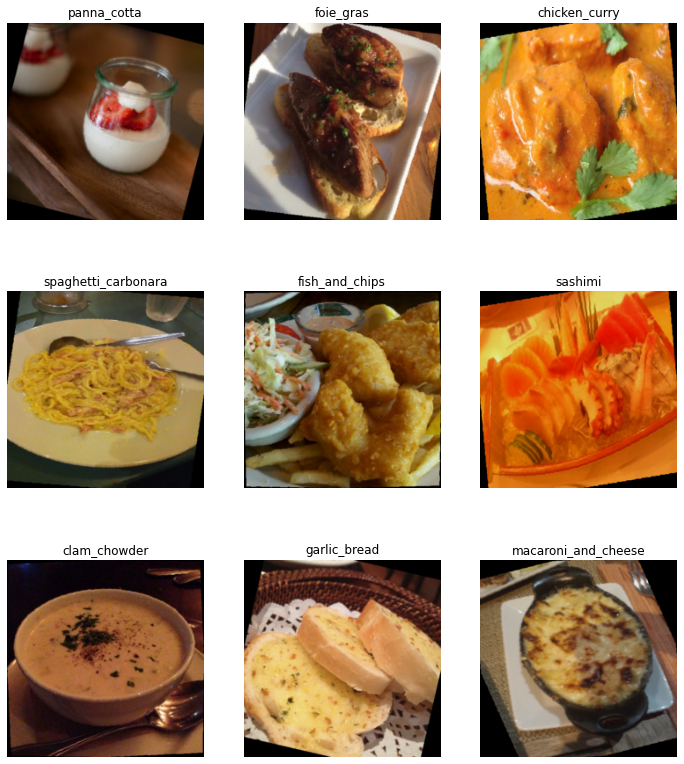

In [12]:
visualize_images(train_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

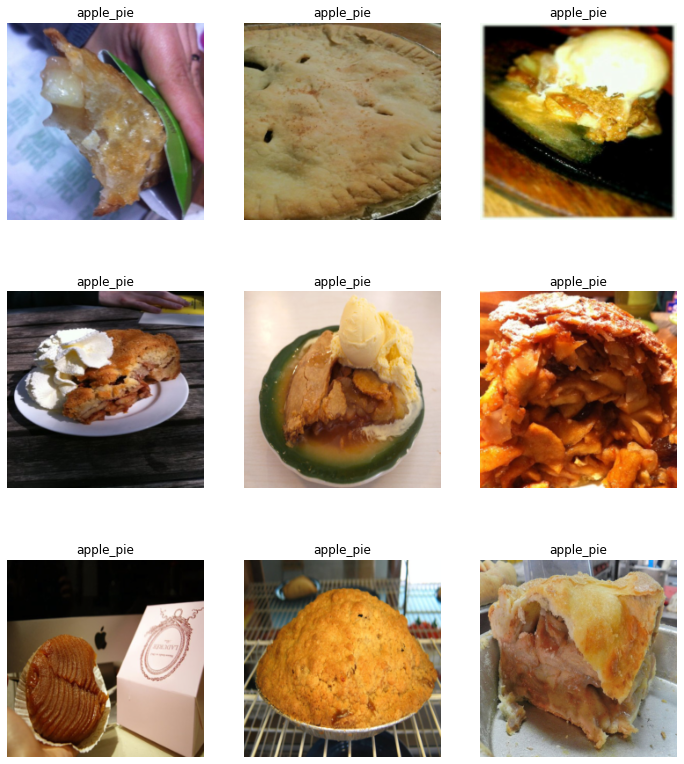

In [13]:
visualize_images(valid_loader)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50


train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
valid_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

train_dataset = torchvision.datasets.ImageFolder(f'{path}/images/',transform=train_transforms)
valid_dataset = torchvision.datasets.ImageFolder(f'{test_path}',transform=valid_transforms)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True,num_workers=4,pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size,shuffle=False,num_workers=4,pin_memory=True)

model = resnet50(pretrained=True)

model

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
for i,param in enumerate(model.parameters()):
    if i<100:
        param.requires_grad=False

model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048,101)
)

In [ ]:
cuda = True
epochs = 10
model_name = '/content/drive/MyDrive/resnet50.pt'
optimizer = torch.optim.Adam(model.parameters(),lr=4e-5,weight_decay=0.001)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1,patience=1,verbose=True)

writer = SummaryWriter() # For Tensorboard
early_stop_count=0
ES_patience=5
best = 0.0
if cuda:
    model.cuda()

for epoch in range(epochs):
    
    # Training
    model.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc = 'Training', position=0, leave=True)
    for i,(inp,lbl) in enumerate(tbar):
        optimizer.zero_grad()
        if cuda:
            inp,lbl = inp.cuda(),lbl.cuda()
        out = model(inp)
        loss = criterion(out,lbl)
        train_loss += loss
        out = out.argmax(dim=1)
        correct += (out == lbl).sum().item()
        loss.backward()
        optimizer.step()
        tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
    train_acc = 100.0*correct/len(train_loader.dataset)
    train_loss /= (len(train_loader.dataset)/batch_size)

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        val_loss = 0.0
        vbar = tqdm(valid_loader, desc = 'Validation', position=0, leave=True)
        for i,(inp,lbl) in enumerate(vbar):
            if cuda:
                inp,lbl = inp.cuda(),lbl.cuda()
            out = model(inp)
            val_loss += criterion(out,lbl)
            out = out.argmax(dim=1)
            correct += (out == lbl).sum().item()
        val_acc = 100.0*correct/len(valid_loader.dataset)
        val_loss /= (len(valid_loader.dataset)/batch_size)
    print(f'\nEpoch: {epoch+1}/{epochs}')
    print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

    scheduler.step(val_loss)

    # write to tensorboard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val", val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val", val_acc, epoch)

    if val_acc>best:
        best=val_acc
        torch.save(model,model_name)
        early_stop_count=0
        print('Accuracy Improved, model saved.\n')
    else:
        early_stop_count+=1

    if early_stop_count==ES_patience:
        print('Early Stopping Initiated...')
        print(f'Best Accuracy achieved: {best:.2f}% at epoch:{epoch-ES_patience}')
        print(f'Model saved as {model_name}')
        break
    writer.flush()
# writer.close()

Training:   0%|          | 0/592 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Validation: 100%|██████████| 198/198 [29:53<00:00,  9.06s/it]



Epoch: 1/10
Train loss: 2.6757524013519287, Train Accuracy: 41.895709570957095
Validation loss: 1.3379731178283691, Validation Accuracy: 68.1029702970297

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:11<00:00,  1.03it/s]



Epoch: 2/10
Train loss: 1.3810490369796753, Train Accuracy: 66.27590759075908
Validation loss: 0.9439844489097595, Validation Accuracy: 75.75445544554455

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:09<00:00,  1.04it/s]



Epoch: 3/10
Train loss: 1.0608574151992798, Train Accuracy: 73.16963696369638
Validation loss: 0.8180769085884094, Validation Accuracy: 78.29702970297029

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:08<00:00,  1.05it/s]



Epoch: 4/10
Train loss: 0.873854398727417, Train Accuracy: 77.55247524752475
Validation loss: 0.7552415728569031, Validation Accuracy: 79.88514851485148

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:09<00:00,  1.05it/s]



Epoch: 5/10
Train loss: 0.7420864105224609, Train Accuracy: 80.9993399339934
Validation loss: 0.7260960340499878, Validation Accuracy: 80.29306930693069

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:07<00:00,  1.06it/s]



Epoch: 6/10
Train loss: 0.6331319808959961, Train Accuracy: 83.57887788778878
Validation loss: 0.7168636322021484, Validation Accuracy: 80.47128712871287

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:13<00:00,  1.02it/s]



Epoch: 7/10
Train loss: 0.5479161143302917, Train Accuracy: 85.7003300330033
Validation loss: 0.697425365447998, Validation Accuracy: 81.00198019801981

Accuracy Improved, model saved.



Validation: 100%|██████████| 198/198 [03:14<00:00,  1.02it/s]



Epoch: 8/10
Train loss: 0.4699757695198059, Train Accuracy: 87.77293729372937
Validation loss: 0.7154322862625122, Validation Accuracy: 80.78415841584159



Validation: 100%|██████████| 198/198 [03:15<00:00,  1.01it/s]



Epoch: 9/10
Train loss: 0.4095655679702759, Train Accuracy: 89.44158415841584
Validation loss: 0.7173397541046143, Validation Accuracy: 80.73267326732673

Epoch 00009: reducing learning rate of group 0 to 4.0000e-06.


Epoch: 10, loss: 0.42385, acc: 92.8189%:  78%|███████▊  | 464/592 [17:02<02:55,  1.37s/it]